In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import *
from matplotlib import pyplot as plt

from ipywidgets import interact
from plot_helper import *

ModuleNotFoundError: No module named 'plot_helper'

In [44]:
equal = np.allclose
v = lambda *c: np.array(c).reshape(-1, 1)
c = lambda *data: np.column_stack(data)
rm = lambda n, d, l=0: np.random.uniform(l, 1, size=n * d).reshape(-1, d)
printf = lambda *data, places=3 : print(np.round(data, places), "\n")

# Mathematics: Linear Algebra - Vectors and Matrices

### Intepretations

* Physics
* Computer Science
* Mathematics 
* Machine Learning

* Column vs. Row
* Data vs. Transformation



### Machine Learning

A vector is typically an observation (, example, case). This is a "data view" of vectors.

eg. consider user ratings of films. Suppose I first rate "Annie Hall" 10/10, and then Transformers 2/2. 

*My* rating vector is $\vec{r_m} = (8, 2)^T$. Suppose *yours* is $\vec{r_y} = (6, 4)^T$.

### Aside: Notation

The shape of $(x, y)$ is read $(1 \, rows, 2 \, cols)$ ie., it has one row and two columns. The shape of $(x,y)^T$ is read $(2, 1)$, ie., two rows one column. Since  data is held in column vectors (by convention in linear algebra), $()^T$ indicates the correct shape. In numpy `.T` switches (*transposes*) the column/row "orientation".

We could also write

$$
\vec{r} = 
  \left[\begin{array}{c} 
      x \\ 
      y
  \end{array}\right]
$$

which *means* $(2 \, rows, 1 \, column)$, but this reads poorly in-line with other text and is often difficult to type set.

In [45]:
rating_m = v(8, 2)
rating_y = v(6, 4)

In [46]:
rating_m

array([[8],
       [2]])

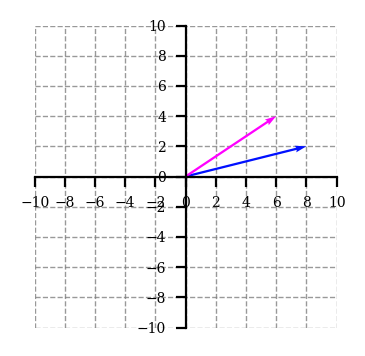

In [47]:
plot_v(rating_m, rating_y)

A "behaviour" view could see, say, the *effect* of eating pop corn as raising the average viewer rating by $(2, 4)$. 

This effect, when added to any rating vector, should increase each component by 2. We therefore regard any vector of magnitude $(2, 2)$ as equivalent, regardless of where its tail is located. 

In [48]:
popcorn = v(2,4)
origins = [v(-3,-2), v(-3,1), v(0,0), v(1,-3)]

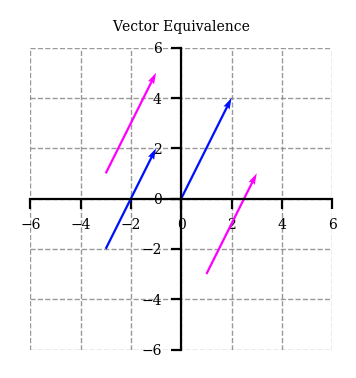

In [49]:
plot_v(popcorn, tails=origins)
plt.title("Vector Equivalence");

In linear algebra we always regard vectors as starting on $(0,0)$.

In Machine Learning, this is equivalent to saying that the features across all observations "have a common zero". 

eg., suppose one data set rates films 10 to 0 (10 best), and another 0 to 10 (0 best). These data sets do not share the same "0"; and are inverses of each other. 

Aside: Suppose they happened to be $0 ... 5$ , $0 ... 10$ -- then they share the same zero ("origin"), but are scaled differently.

The question of whether we can "move between" these different scales without distorting the data is one of the fundamental ones of linear algebra.


## Fundamental Operations

* Vector Scaling
* vip = effect of free vip upgrade
* s = effect size

In [50]:
v(1, 2) + v(2, 2)

array([[3],
       [4]])

In [51]:
@interact(s=1.0)
def draw(s):
    origin = v(0,0) 
    vip = s * v(1, 1.5)
    plot_v(vip, tails=[origin])
    plt.title("$r_{vip}$");

interactive(children=(FloatSlider(value=1.0, description='s', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

* Vector Addition

In [52]:
@interact(s=1.0)
def draw(s):
    origin = v(0,0) 
    vip = s * v(1, 1.5)

    plot_v(rating_m, vip, rating_m + vip, 
           tails=[origin, rating_m, origin])
    
    plt.title("$r_m + r_y$");

interactive(children=(FloatSlider(value=1.0, description='s', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

## Linear Combinations and Basis Vectors

Consider $e_i = (1,0)$, $e_j = (0,1)$

Any vector $v = (x, y)$ can be expressed as just $v = xe_i + ye_j$

ie., linear combinations of $e_i$ , $e_j$ *span* the 2d plane. These *basis vectors* can then be taken to define the space. 

eg., Consider two differnt ratings systems, system one has $e_i = (1,0)$ but in system two, (1,0) actually means (9, 10) ie., system two's highest ratings are 10. Then the basis for two, as seen from one is, $e'_i = (9,10)$. 

Basis vectors define the "axes" of a space, and provide the means to transform between them. 

Aside: $p$ is 'p', and $p'$ is 'p prime' -- a prime is often used as a kind of "version number": $p, p', p'', p'''$ -- $p_{version1}, p_{version2}, p_{version3}$

In [53]:
i = v(1, 0)
j = v(0, 1)

@interact(x=1.0, y=1.0)
def draw(x, y):
    plot_v(x*i + y*j)

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

In [54]:
rm(3,2,-1)

array([[-0.08811519, -0.07148119],
       [ 0.90522713, -0.92663324],
       [-0.04038322,  0.80951275]])

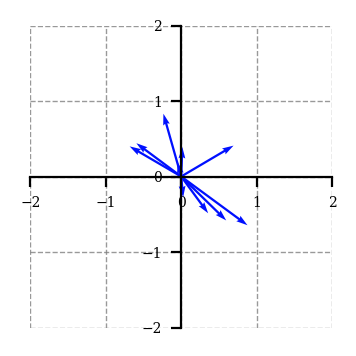

In [55]:
vectors = [(x*i + y*j) for x, y in rm(10, 2, -1)]

plot_vector(vectors)

Basis vectors need to be perpendicular ("linearly independent") to span the whole space. 

In [56]:
rating_m

array([[8],
       [2]])

In [57]:
8 * i + 2 * j

array([[8],
       [2]])

In [58]:
all(rating_m == 8*i + 2*j)

True

In the ratings case $i$ is "AnnieHall" and $j$ is "Transformers". The scalar on the $i$ component is how much you like AnnieHall. 

## Properties of Vectors

* Length: "norm"
* Direction

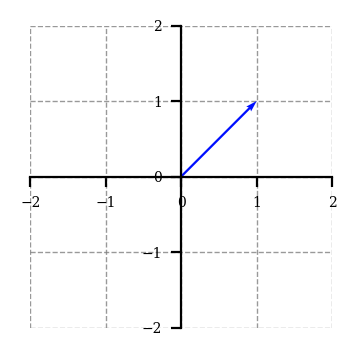

In [59]:
r = v(1,1)
plot_v(r)

$||\vec{r}|| = \sqrt(\vec{r_x}^2 + \vec{r_y}^2)$

In [60]:
(r[0] ** 2 + r[1] ** 2) ** (1/2.0)

array([1.41421356])

In [61]:
norm(v(1,1)) == np.sqrt(2)

True

In [62]:
norm(v(3, 3) - v(1, 1))

2.8284271247461903

In [63]:
norm(v(2, 2))

2.8284271247461903

* A vector divided by its length as unit length (ie., $||r|| = 1$)

In [64]:
r_unit = r / np.linalg.norm(r)

print(r_unit)
print(f"{norm(r_unit) : .3f}")

[[0.70710678]
 [0.70710678]]
 1.000


* The dot product between two vectors (weighted sum) is proportional to their lengths and the angle between them.

$\vec{a} \cdot \vec{b} = a^Tb = a_1 * b_1 + a_2 * b_2 = ||a|| * ||b|| * cos(\theta_{ab})$

* If a and b are both unit vectors, the product of their lengths is $1$, so the dot product is just cosine of their angle. 

$\hat{a} \cdot \hat{b} = a_1 * b_1 + a_2 * b_2 = cos(\theta_{ab})$

* The angle of a vector to the x-axis is then just the arcos of $(r_x, r_y)\cdot(1,0)$, ie., its dot product with a unit vector in the x-direction.

In [65]:
x_unit = v(1, 0)

In [66]:
np.degrees(np.arccos( 
    r_unit[0] * x_unit[0] + r_unit[1] * x_unit[1]
))

array([45.])

In [67]:
np.degrees(np.arccos( 
    r_unit.T @ x_unit
))

array([[45.]])

# Matrices

In the ascending ratings system (/10) my ratings vector is:

$r_m = 8i + 2j$

In the descending system (/5) my vector is:

$r'_m = 1i' + 4j'$


A matrix is a linear transformation. M applied to $r_m$ produces $r'_m$

$$
M = 
  \left[\begin{array}{c} 
      0.0 \quad \, 0.5 \\ 
      0.5 \quad \, 0.0  
  \end{array}\right]
$$


In [68]:
M = c(v(0,0.5), v(0.5,0))
M

array([[0. , 0.5],
       [0.5, 0. ]])

In [69]:
M = np.array([[0,0.5], [0.5,0]])

M @ rating_m

array([[1.],
       [4.]])

In [70]:
i

array([[1],
       [0]])

In [71]:
M @ i

array([[0. ],
       [0.5]])

In [72]:
j

array([[0],
       [1]])

In [73]:
M @ j

array([[0.5],
       [0. ]])

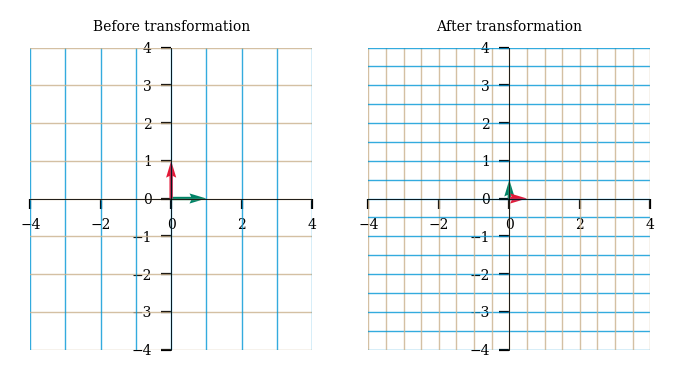

In [74]:
plot_linear_transformation(M)

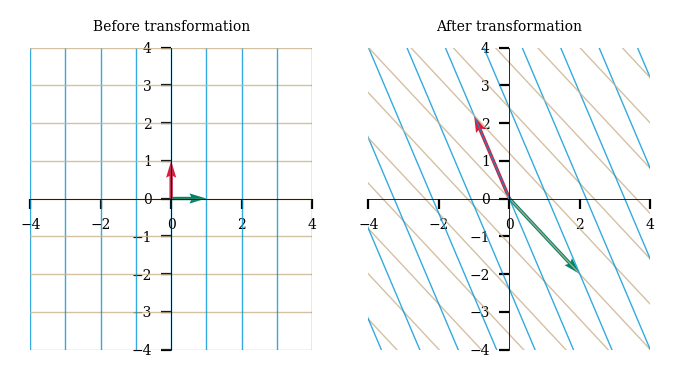

In [75]:
A = c(v(2, -2), v(-1, 2.2))

plot_linear_transformation(A)

* The first column of A provides $i'$ and the second $j'$...
* ie., $r_m$ can be converted to $r'_m$ using $A_0$ as $i$ and $A_1$ as $j$

In [76]:
new_i = A[:, 0]
new_j = A[:, 1]

In [77]:
A @ rating_m

array([[ 14. ],
       [-11.6]])

In [78]:
rating_m[0] * new_i + rating_m[1] * new_j

array([ 14. , -11.6])

In [79]:
printf(rm(3,3) * np.eye(3))

[[[0.958 0.    0.   ]
  [0.    0.501 0.   ]
  [0.    0.    0.663]]] 



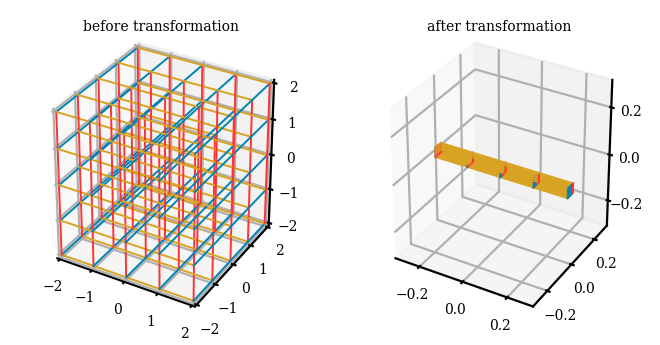

In [80]:
plot_3d_linear_transformation(rm(3,3) * np.eye(3))

# Algebraic Products

### Aside: Machine Learning Conventions

In ML it is typical to write:  $M^{row}_{col} = M^r_c$ where we read the "row", $r$ as being the rth observation; and $c$ as being the cth column. 

This is in contrast to the linear algebra convention $M_{r,c}$ -- as mostly in machine learning we ignore $r$ and define most formulae for all rows ($\forall r$), eg., $y = w_1X_1 + w_2X_2$ effectively treats $X_1$ as meaning "the column of data $X_1$". 

In python when leaving off an index we use `:` (which we could read as "forall"), so...

$M^r_c \quad \forall r \quad = M_c = $ `M[:, c]`

## Aside: Machine Learning Problems

There are several strategies for making linear algebra intutive and motivating the need for it. Previously we looked at a deeply problem centric approach. 

In this notebook we're going to illustrate with both the usual arrows, and with images. 

An image is a matrix of pixel intensities:

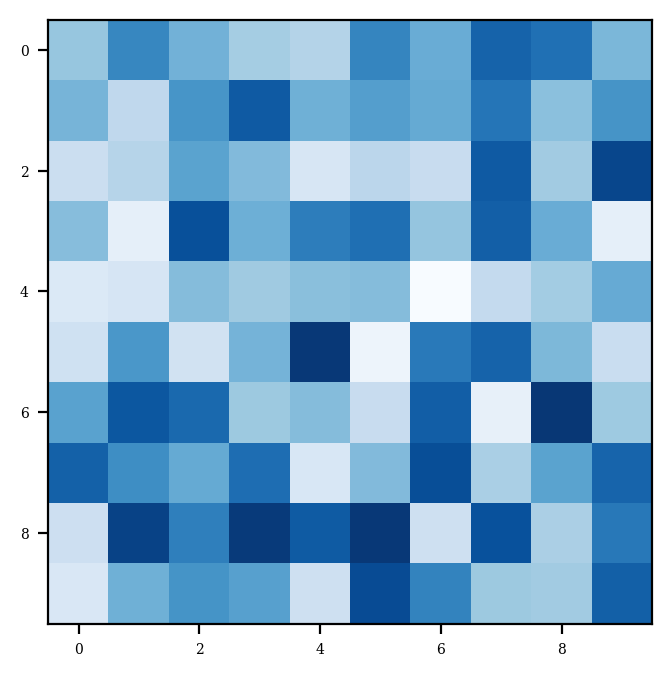

In [81]:
plot_img(rm(10, 10))

...where each column is a vector. 

We can c visualize matrices and vectors trivially this way by keeping our matrix entries between a min/max we can map to black/white, off/on intensity. For the sake of this visual then, all scalars in this notebook will run between 0 and 1, however the mathematics abitarily generalizes.

Many intutions about linear algebra are geometric, and are easily illustrated visually.

However they apply in non-visual "geometries". For example in the *space of ratings* a column vector is a *position*, and a matrix is a *transfomation of the space* which repositions the vectors. Such a transformation may be needed to rescale the values, or to perform some algorthim-specific task. 

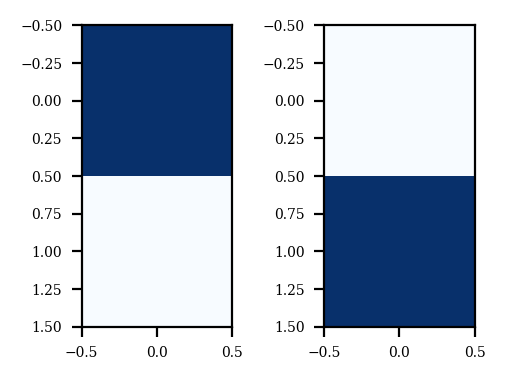

In [82]:
plot_img(v(1,0), v(0, 1))

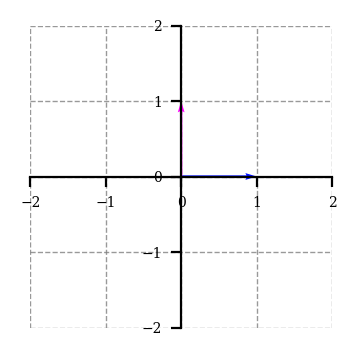

In [83]:
plot_v(v(1,0), v(0,1))

## Matrix-Vector Products

* Applying the linear transformation, $M$ to a vector $\vec{v}$, is equivalent to `M @ v`, ie., $Mv$


In [85]:
i = v(1, 0) 
j = v(0, 1)

#F = m((j, i), 2, 2)

In [ ]:
r = v(.2, .8)

In [ ]:
plot_img(F, r, F @ r)

In [ ]:
print_col(pre='r', post='F@r')

In [ ]:
plot_v(r, F@r)

In [ ]:
mi = .9*i
mj = .7*j

M = c(mi, mj)

plot_img(M, r, M @ r)

### Understanding Transforms

Recall that given,

$$
\vec{r} = 
  \left[\begin{array}{c} 
      r_x \\
      r_y   
  \end{array}\right]
$$


$$
M = [\vec{m_i}, \vec{m_j}] = \left[\begin{array}{c} 
      M^0_i \, M^0_j \\ 
      M^1_i \, M^1_j  
  \end{array}\right]
$$


then 

$\vec{r'} = Mv = x\vec{m_i} + y\vec{m_j}$

ie., $\vec{r}$ is transformed into $\vec{r'}$ such that its $r_x$ now scales M's $\vec{m_i}$, and $r_y$ scales $\vec{m_j}$

In [ ]:
r

In [ ]:
r_prime = M @ r
r_prime 

In [ ]:
r[0] * M[:, 0] + r[1] * M[:, 1]

## Interesting Transformations

* Scaling
* Rotating
* Shearing


In [86]:
c(i, j)

array([[1, 0],
       [0, 1]])

In [87]:
@interact(scale=1.1)
def draw(scale):
    plot_linear_transformation(scale * c(i, j))

interactive(children=(FloatSlider(value=1.1, description='scale', max=3.3000000000000003, min=-1.1), Output())…

In [88]:
@interact(angle=180)
def draw(angle):
    angle = np.radians(angle)
    
    R_i = v(np.cos(angle), np.sin(angle))
    R_j = v(-np.sin(angle), np.cos(angle))

    plot_linear_transformation(c(R_i, R_j))

interactive(children=(IntSlider(value=180, description='angle', max=540, min=-180), Output()), _dom_classes=('…

In [89]:
@interact(i_shear=1.5, j_shear=0.0)
def draw(i_shear, j_shear):
    I = np.eye(2)
    I[0,1] = i_shear
    I[1,0] = j_shear
    plot_linear_transformation(I)

interactive(children=(FloatSlider(value=1.5, description='i_shear', max=4.5, min=-1.5), FloatSlider(value=0.0,…

## Matrix-Matrix Products

* $A = BC$ means $C$ then $B$
* ie., $Av = B(Cv)$
* order matters $CB \neq BC$

## Matrix Inverses


In [ ]:
from numpy.linalg import inv

A = c(2*j, 3*i)
A

In [ ]:
A_inv = inv(A)
A_inv

In [ ]:
A @ v(2, 3)

In [ ]:
A_inv @ v(9, 4)

In [ ]:
A @ A_inv